This notebook is taken from https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb and I have made further modifications.

# In Depth: Principal Component Analysis

Up until now, we have been looking in depth at supervised learning estimators: those estimators that predict labels based on labeled training data. Here we begin looking at several unsupervised estimators, which can highlight interesting aspects of the data without reference to any known labels.

### Supervised and unsupervised estimators
They are two types of learning methods used in machine learning.

For supervised estimator the machine learning algorithm is trained on a labeled dataset. If the dataset contains input features and corresponding output labels, supervised estimator is used to find a mapping between the input features and output labels, so that the machine learning algorithm can predict the output label for new, unseen input features of test datasets.

Examples of supervised learning algorithms include linear regression, logistic regression, decision trees, and neural networks.

In Unsupervised estimator the machine learning algorithm is trained on an unlabeled dataset. In this case, the dataset contains input features only, without corresponding output labels. It is used to find patterns and structures in the data, without any prior knowledge of what those patterns or structures might be.

Examples of unsupervised learning algorithms include clustering algorithms such as k-means and hierarchical clustering, and dimensionality reduction algorithms such as principal component analysis (PCA) and t-SNE.


In this section, we explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA). PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more. After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.

We begin with the standard imports:


In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introducing Principal Component Analysis

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data, which we saw briefly in Introducing Scikit-Learn . Its behavior is easiest to visualize by looking at a two-dimensional dataset. 

It works by trying to locate the principal components of a dataset, i.e., the directions of maximum variation (variance) in the data. These principal components are then used to project the data onto a lower-dimensional space. The first principal component explains the most variation in the data, and each subsequent principal component explains the remaining variation in the data, with each component being orthogonal to the previous ones.

Consider the following 200 points:

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

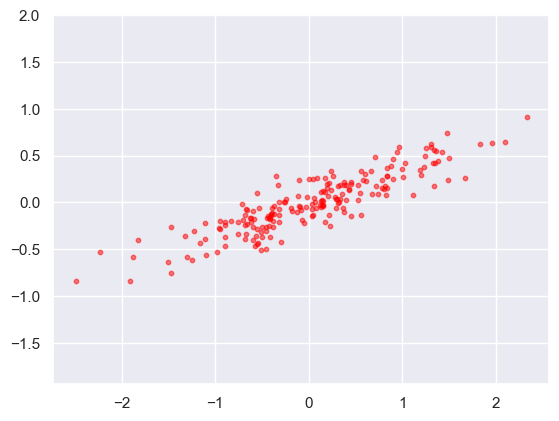

In [16]:
rng = np.random.RandomState(1)   #RandomState()-generates random numbers and random arrays using various probability distributions
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T    #.randn creates an array of random numbers
plt.scatter(X[:, 0], X[:, 1], color='red', s=10, alpha=0.5)
plt.axis('equal')    #ensures that x-axis and y-axis scales are equal in the plot

#X[:, 0] selects all rows of the X array and the first column
#X[:, 1] selects all rows and second column
#creating a 2-dimensional dataset X of size 200
#the two dimensions are generated by taking the dot product of a 2x2 matrix with a 2x200 matrix of random numbers drawn from a standard normal distribution. 
#The resulting 2x200 matrix is then transposed to give a 200x2 matrix.

The 2x2 matrix is generated randomly having values between 0 and 1. The 2x200 matrix is also randomly generated but the numbers are drawn from a normal distribution with mean 0 and standard deviation 1. The dot product of transpose of these two matrices gives a linearly correlated matrix of 200x2.

In [17]:
X   #printing the new created dataset X

array([[-6.25301618e-01, -1.70063657e-01],
       [ 9.60695033e-01,  5.90900597e-01],
       [-5.98543385e-01, -4.02593393e-01],
       [-2.22805938e+00, -5.32576740e-01],
       [-4.61430060e-01, -4.98867244e-01],
       [-9.58929028e-01, -2.69331024e-01],
       [-6.73079909e-01, -3.38308547e-01],
       [ 1.30501861e+00,  5.91357846e-01],
       [ 3.74545597e-01, -9.85442049e-02],
       [-1.82628627e+00, -4.06170254e-01],
       [ 6.68262284e-01,  3.36877396e-01],
       [-5.82646676e-01, -1.77369217e-01],
       [-4.18128976e-01, -3.73811389e-01],
       [ 1.72209371e-01,  2.64668836e-01],
       [ 3.77116687e-01,  1.88442969e-01],
       [-6.79396230e-01, -1.31601978e-01],
       [ 1.03148960e+00,  4.25550018e-01],
       [ 3.36041799e-01,  3.90982721e-02],
       [ 7.05745985e-01,  4.88730649e-01],
       [ 8.39511547e-01,  1.52125872e-01],
       [ 1.49882898e+00,  4.71380809e-01],
       [ 2.88356638e-01,  3.31334714e-02],
       [-5.02935011e-01, -3.68665426e-01],
       [ 1.



By eye, it is clear that there is a nearly linear relationship between the x and y variables. This is reminiscent of the linear regression data we explored in In Depth: Linear Regression, but the problem setting here is slightly different: rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn's PCA estimator, we can compute this as follows:

Number of Principal Components: 1
Percentage of Data Preserved: 97.63%
Percentage of Data Lost: 2.37%

Number of Principal Components: 2
Percentage of Data Preserved: 100.00%
Percentage of Data Lost: 0.00%



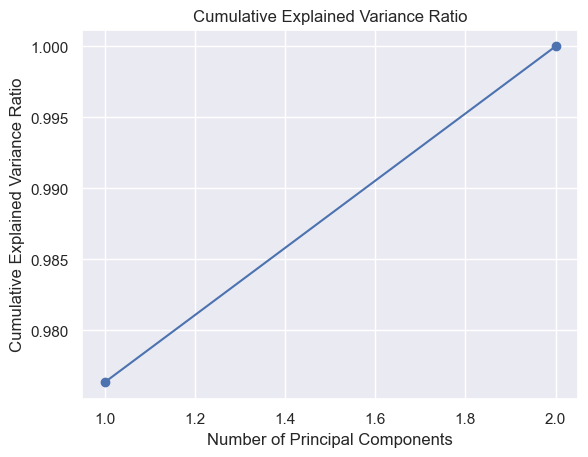

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  #The n_components parameter sets the number of principal components to be extracted.
pca.fit(X)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_   
#provides the percentage of variance explained by each of the selected principal components

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
# each element represents the cumulative sum of the explained variance ratios up to that point.

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio) + 1),cumulative_variance_ratio, '-o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
#plt.ylim([0, 1])
plt.title('Cumulative Explained Variance Ratio')

# Calculate the percentage of data preserved
percentage_preserved = cumulative_variance_ratio * 100
percentage_lost = 100 - percentage_preserved

# Print the results
for i in range(len(cumulative_variance_ratio)):
    print(f"Number of Principal Components: {i + 1}")
    print(f"Percentage of Data Preserved: {percentage_preserved[i]:.2f}%")
    print(f"Percentage of Data Lost: {percentage_lost[i]:.2f}%")
    print()

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [19]:
#printing the values of the extracted components
print(pca.components_)  
#Each row in the components_ array represents a principal component,
#and the columns correspond to the original features or dimensions of the input data.

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [20]:
print(pca.explained_variance_)
#gives values of the amount of variance explained by each principal component

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

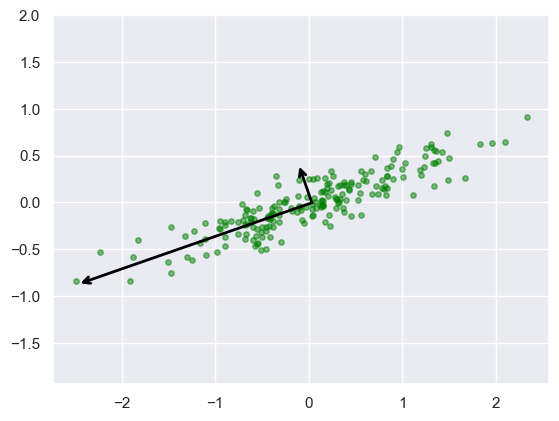

In [21]:
#defining a function to draw vectors with following arguments:
#v0: A NumPy array containing the starting point of the arrow (the tail of the vector).
#v1: A NumPy array containing the end point of the arrow (the tip of the vector).
#ax: An optional argument specifying the Matplotlib Axes object on which the arrow should be drawn. 

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()       #plt.gca() ( stands for "get current axes").
    arrowprops=dict(arrowstyle='->', color='black', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops) #adds arrow to plots
#arrowpops-specify the properties of the arrow
#shrinkA and shrinkB arguments are used to control how much the arrow is shortened at the start and end points to avoid overlapping with the plotted data.

# plot data
plt.scatter(X[:, 0], X[:, 1], color='green', s=15, alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector  * np.sqrt(length)*3      # here 3 is scaling factor
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

#zip() function creates a sequence of (length, vector) tuples. 
#For each principal component, it computes the vector v by multiplying the unit vector by 3 times the square root of the corresponding explained variance.



These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

##### If we plot these principal components beside the original data, we see the plots shown here:


#### code for obtaining the two plots as given in appendix of google colab of the github account notebook
#### https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb 

##### Principal Components Rotation


In [22]:
from sklearn.decomposition import PCA

def draw_vector(v0, v1, ax=None):

    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', color='black', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

[Text(0.5, 0, 'component 1'),
 Text(0, 0.5, 'component 2'),
 Text(0.5, 1.0, 'principal components'),
 (-5.0, 5.0),
 (-3.0, 3.1)]

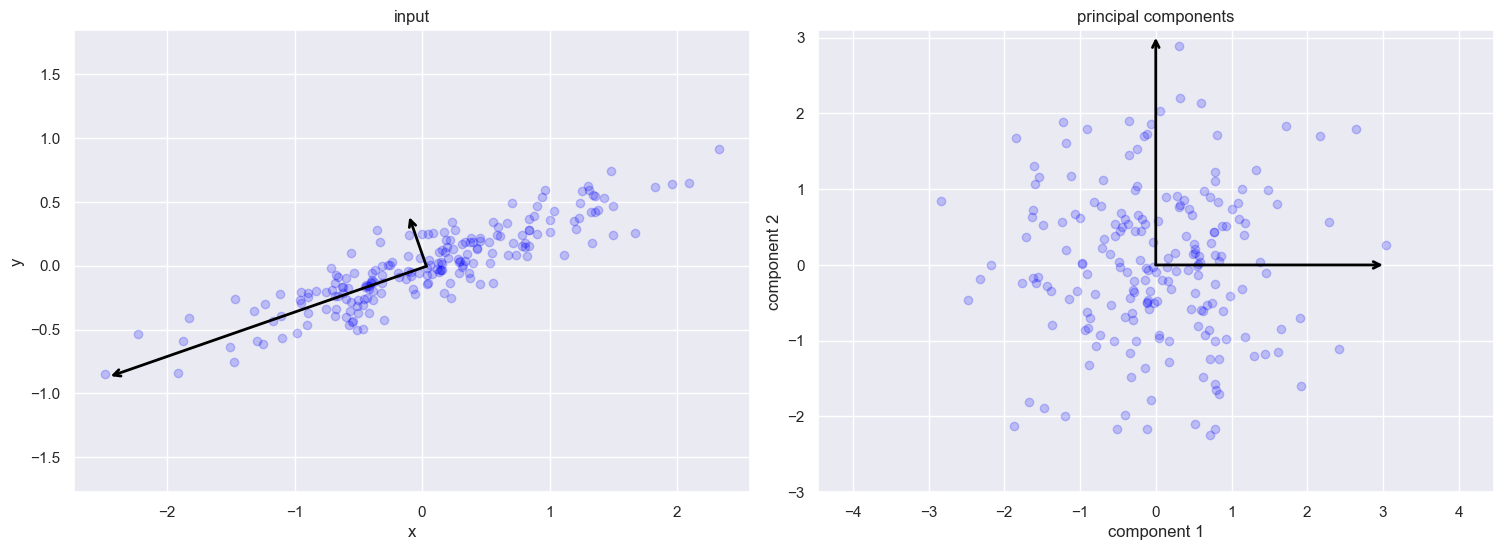

In [23]:

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)  #whiten if True, components_ vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)   #adjusts the spacing around the subplots.

### plot data (for ax=0 implying 1st column)
ax[0].scatter(X[:, 0], X[:, 1], color='blue', alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

### plot principal components
X_pca = pca.transform(X)   #reducing no. of features or dimensionlity
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], color='blue', alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2', title='principal components', xlim=(-5, 5), ylim=(-3, 3.1))

#fig.savefig('figures/05.09-PCA-rotation.png')



This transformation from data axes to principal axes is an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.


#### principal components rotation using pca

Principal components rotation is a technique used to interpret and visualize the results of a principal component analysis (PCA). To simplify the interpretation of the principal components which are orthogonal to each other, a rotation can be applied to the component loadings (i.e., the coefficients that define each principal component as a linear combination of the original variables). This creates a simpler structure of the loadings for easy interpretation. Few of the rotation methods available are varimax, oblimin and quartimin.
Principal component rotation can be done using the FactorAnalyzer package. Component loadings are rotated using the 'fit' method of the FactorAnalyzer class. In the example below we use the 'varimax' method for rotation.

In [24]:
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fa = FactorAnalyzer(rotation='varimax')
fa.fit(X_pca)
rotated_loadings = fa.loadings_
print("PCA components:\n", pca.components_)
print("Factor loadings:\n", rotated_loadings)

PCA components:
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
Factor loadings:
 [[1.82679858e-08 0.00000000e+00]
 [3.84126015e-09 0.00000000e+00]]


## PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [25]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)


original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

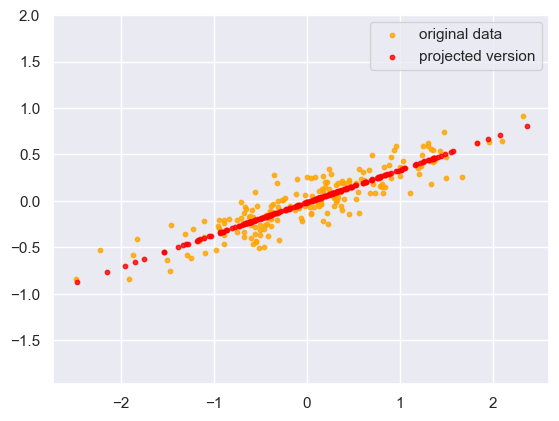

In [26]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], color='orange', s=10, alpha=0.8, label='original data')
plt.scatter(X_new[:, 0], X_new[:, 1], color='red', s=10, alpha=0.8, label='projected version')
plt.axis('equal');
plt.legend()



The orange points are the original data, while the dark red points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.


## PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data. To see this, let's take a quick look at the application of PCA to the digits data we saw in  In-Depth: Decision Trees and Random Forests.

We start by loading the data:

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
#digits.data
#digits

#The load_digits() function is used to load a dataset of handwritten digits from 0 to 9 as 8x8 images. 
#It returns a dictionary-like object that contains the data, target labels, and other information about the dataset.
#the pixel values or intensity of the pixels are between 0 to 16.

(1797, 64)

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional.

The shape of digits.data is (1797, 64). This which means that there are 1797 images in the dataset, and each image is represented as a 1-dimensional array of length 64 (8x8 pixels).

To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

(1797, 64)
(1797, 2)
Percentage of Data Preserved: 28.51%
Percentage of Data Lost: 71.49%



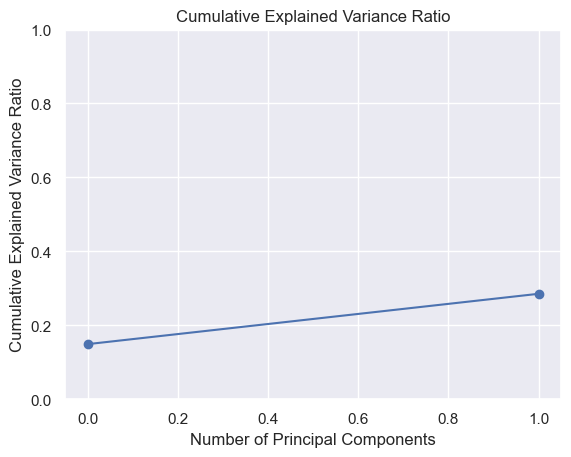

In [28]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
#projected
print(digits.data.shape)   #original data
print(projected.shape)     #transformed data

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance ratio
plt.plot(cumulative_variance_ratio, '-o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.ylim([0, 1])
plt.title('Cumulative Explained Variance Ratio')

# Calculate the percentage of data preserved
percentage_preserved = cumulative_variance_ratio * 100
percentage_lost = 100 - percentage_preserved

# Print the results
print(f"Percentage of Data Preserved: {percentage_preserved[i]:.2f}%")
print(f"Percentage of Data Lost: {percentage_lost[i]:.2f}%")
print()

We can now plot the first two principal components of each point to learn about the data:

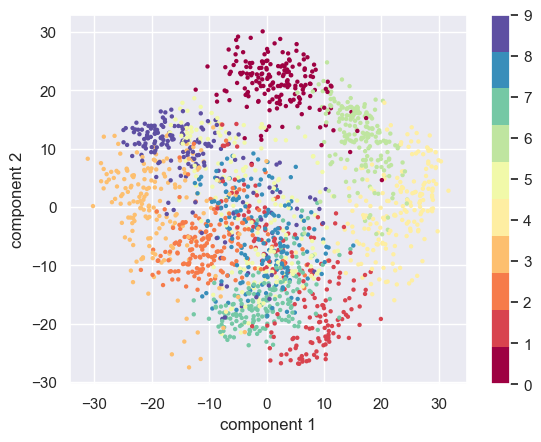

In [29]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', s=10, alpha=1.0, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

#The spectral colormap has been removed from matplotlib in version 2.2.
# so I used "Spectral" or "nipy_spectral"
#sets the color of each point based on its label (digits.target)
#edgecolor sets color of the edges of the points to transparent.

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

## What do the components mean?

We can go a bit further here, and begin to ask what the reduced dimensions mean. This meaning can be understood in terms of combinations of basis vectors. For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector x:

x=[x1,x2,x3⋯x64]

One way we can think about this is in terms of a pixel basis. That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

image(x)=x1⋅(pixel 1)+x2⋅(pixel 2)+x3⋅(pixel 3)⋯x64⋅(pixel 64)

One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors. For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image: we've thrown out nearly 90% of the pixels!

In [30]:
### Digits Pixel Components

def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

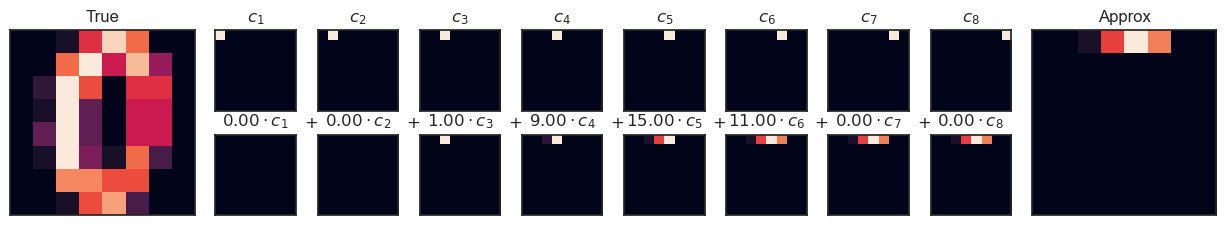

In [31]:
from sklearn.datasets import load_digits

digits = load_digits()
sns.set_style('white')

fig = plot_pca_components(digits.data[10],
                          show_mean=False)

#fig.savefig('figures/05.09-digits-pixel-components.png')



The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image. Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image. Were we to continue this sequence and use all 64 pixels, we would recover the original image.

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like

image(x)=mean+x1⋅(basis 1)+x2⋅(basis 2)+x3⋅(basis 3)⋯

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset. The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series. This figure shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions:


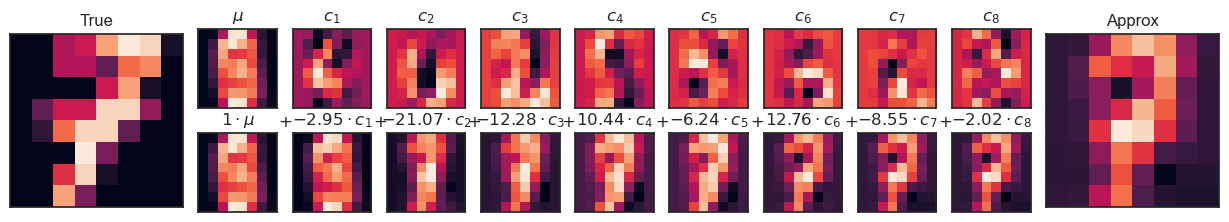

In [32]:
## Digits PCA Components

pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')   # simple plot with a white background, this command sets the style of the plot.
fig = plot_pca_components(digits.data[7], Xproj[7], pca.mean_, pca.components_)
#[7] - this is basically the8th 1-D array which prints the digit 7 (no.s start from 0-9)
#fig.savefig('figures/05.09-digits-pca-components.png')

Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components! The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example. This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

## Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

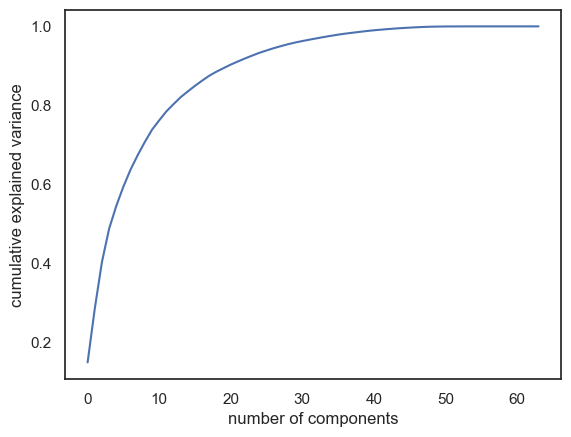

In [33]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');



This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.


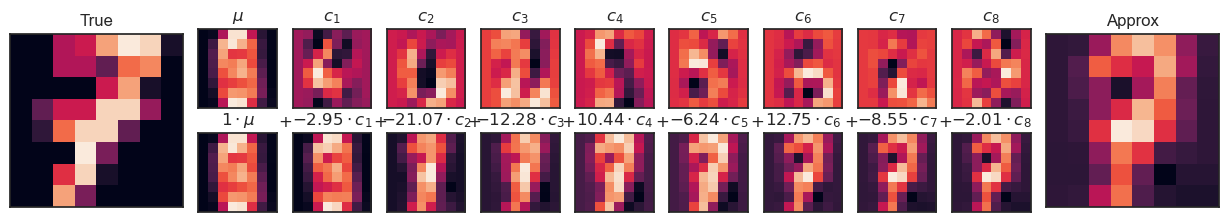

In [34]:
pca = PCA(n_components=20)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')   # simple plot with a white background, this command sets the style of the plot.
fig = plot_pca_components(digits.data[7], Xproj[7], pca.mean_, pca.components_)

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data. First we will plot several of the input noise-free data:


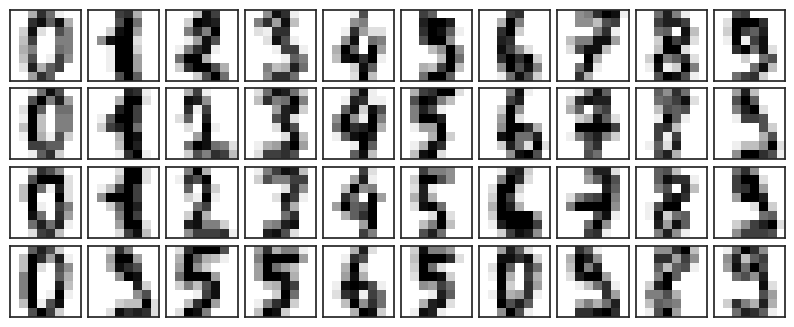

In [35]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), 
                             subplot_kw={'xticks':[], 'yticks':[]}, 
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
plot_digits(digits.data)

#subplot_kw parameter is used to remove the x and y ticks from each subplot(lines in a graph paper)
#the gridspec_kw parameter is used to set the spacing between the subplots.
#for loop iterates over the first 40 subplots, flattens the 4x10 grid of subplots into a 1-dimensional array
#For each subplot, image in data is reshaped to an 8x8 grid 
#clim parameter sets the color range of the image to be between 0 and 16.



Now lets add some random noise to create a noisy dataset, and re-plot it:


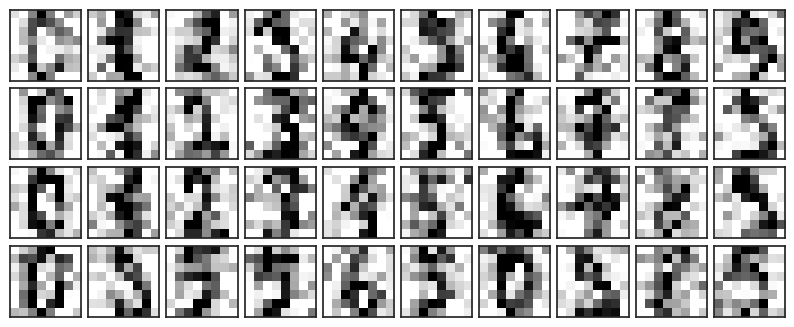

In [36]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)  # applies Gaussian noise to the digit images using np.random.normal() with a standard deviation of 4.
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels. Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [37]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

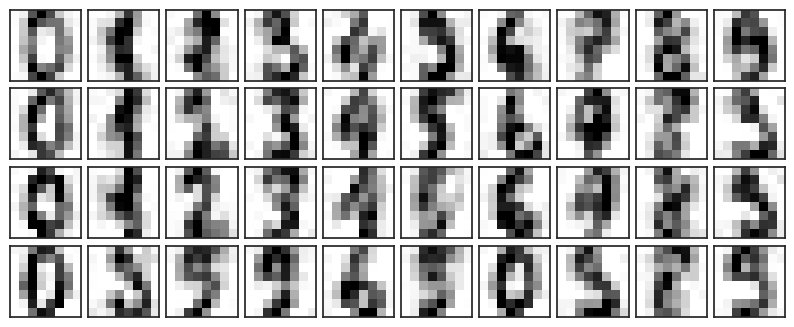

In [38]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

## Example: Eigenfaces

Earlier we explored an example of using a PCA projection as a feature selector for facial recognition with a support vector machine (see In-Depth: Support Vector Machines). Here we will take a look back and explore a bit more of what went into that. Recall that we were using the Labeled Faces in the Wild dataset made available through Scikit-Learn:

In [39]:
from sklearn.datasets import fetch_lfw_people           #Labeled Faces in the Wild" (LFW) dataset 
#each image labeled with the name of the person in the image.

faces = fetch_lfw_people(min_faces_per_person=60)
#only people with at least 60 images in the dataset are included, helps reduce class imbalance.
print(faces.target_names)
print(faces.images.shape)
#faces

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


The command print(faces.images.shape) prints the shape of the images attribute of the faces object, which is a 3-dimensional NumPy array containing the pixel values of the face images. The first dimension represents the number of images in the dataset, the second dimension represents the height of each image, and the third dimension represents the width of each image. For example, if the shape of faces.images is (1348, 62, 47), this means there are 1348 face images in the dataset, each with a height of 62 pixels and a width of 47 pixels.

Let's take a look at the principal axes that span this dataset. Because this is a large dataset, we will use RandomizedPCA—it contains a randomized method to approximate the first N principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000). We will take a look at the first 150 components:

In [40]:
#from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

#we later see that taking 150 components cover 90% of the variance so it is used the reduced dimension from 3000.
#RandomizePCA() was depreciated in an older version of SKLearn and is simply a parameter in PCA().

PCA(n_components=150)

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors," so these types of images are often called "eigenfaces"). As you can see in this figure, they are as creepy as they sound:

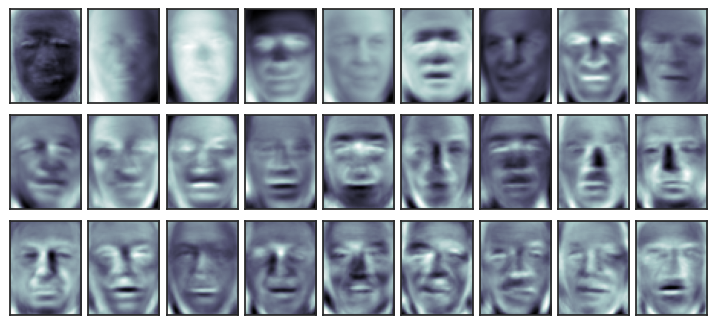

In [43]:
# plotting the faces by highlighting the features associated with the first several principle components
fig, axes = plt.subplots(3, 9, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
#    

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips. Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

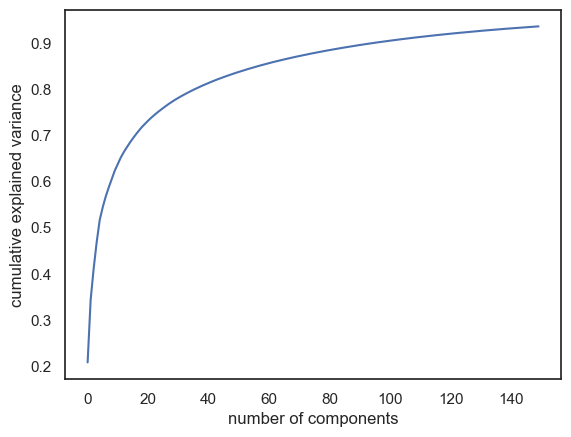

In [46]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');



We see that these 150 components account for just over 90% of the variance. That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data. To make this more concrete, we can compare the input images with the images reconstructed from these 150 components:


In [47]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

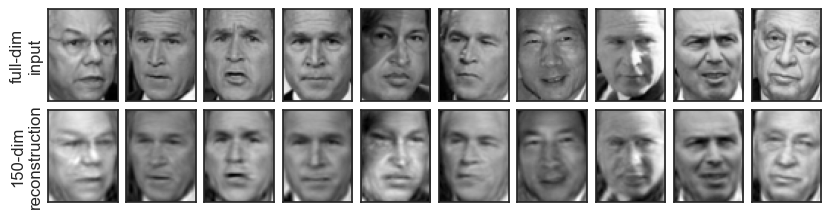

In [48]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')    #original
ax[1, 0].set_ylabel('150-dim\nreconstruction');    #reduced

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features. This visualization makes clear why the PCA feature selection used in In-Depth: Support Vector Machines was so successful: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image. What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.

### Applying PCA on my own case of Naive Bayes

In [1]:
#importing the necessary libraries

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score#,plot_confusion_matrix

#function plot_confusion_matrix is depreceted in 1.0 and will be removed in 1.2. 
#Thetrefore using confusion_matrix_display instead
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns


In [2]:
import csv
data = pd.read_csv("C:/Users/SREEPARNA/OneDrive/Documents/Naive bayes data.csv")
# Replace NaN values with 0
data1 = data.fillna(0)

# Print the DataFrame with NaN values replaced
#data1

In [3]:
drop_columns = ['pl_name', 'hostname', 'discoverymethod', 'disc_facility', 'pl_bmassprov', 'st_spectype', 'decstr', 'st_metratio', 'rastr']
data1 = data1.drop(drop_columns, axis=1)
#data1

In [4]:
Label = []
label = np.where(data1['pl_bmasse'] > 318, 1, 0)
data1['Label'] = label
data1

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,...,st_mass,st_met,st_logg,ra,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag,Label
0,2,1,2007,0,326.030000,1.290000,12.1,1.08,6165.60000,19.40000,...,2.70,-0.350,2.31,185.178779,17.793252,93.1846,4.72307,2.282,4.44038,1
1,1,1,2009,0,516.219970,1.530000,12.3,1.09,4684.81420,14.74000,...,2.78,-0.020,1.93,229.274595,71.823943,125.3210,5.01300,1.939,4.56216,1
2,1,1,2008,0,185.840000,0.830000,12.9,1.15,1525.50000,4.80000,...,2.20,-0.240,2.63,352.824150,39.235837,75.4392,5.23133,2.331,4.91781,1
3,1,2,2002,0,1765.038901,2.773069,12.6,1.12,2586.74645,8.13881,...,0.91,0.405,4.45,242.602101,43.816362,17.9323,6.61935,4.714,6.38300,1
4,3,1,1996,0,798.500000,1.660000,13.5,1.20,565.73740,1.78000,...,1.08,0.060,4.36,295.465642,50.516824,21.1397,6.21500,4.651,6.06428,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5317,2,3,1996,0,4.617033,0.059222,14.0,1.25,218.53100,0.68760,...,1.30,0.101,4.13,24.198353,41.403815,13.4054,4.09565,2.859,3.98687,0
5318,2,3,1999,0,241.258000,0.827774,12.3,1.10,4443.24113,13.98000,...,1.30,0.101,4.13,24.198353,41.403815,13.4054,4.09565,2.859,3.98687,1
5319,2,3,1999,0,1276.460000,2.513290,12.5,1.11,3257.74117,10.25000,...,1.30,0.101,4.13,24.198353,41.403815,13.4054,4.09565,2.859,3.98687,1
5320,1,1,2021,0,385.200000,1.180000,14.2,1.27,162.09249,0.51000,...,1.48,-0.200,2.46,174.237219,-0.823564,52.5973,4.30490,2.184,4.03040,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data1.drop(["Label"],axis=1), label, test_size=0.3, random_state=42)
X_train



,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,...,st_rad,st_mass,st_met,st_logg,ra,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
1702,1,2,2016,0,11.295400,0.09050,2.300,0.205,5.90000,0.01860,...,0.73,0.77,0.000,4.59,338.942550,-14.027727,311.3130,14.266,11.838,13.93950
5097,1,1,2016,0,3.372650,0.04490,13.899,1.240,190.69800,0.60000,...,1.02,1.07,-0.020,4.44,332.714337,-30.749719,448.6370,12.724,11.310,12.57540
3375,1,2,2014,0,13.060855,0.10800,1.360,0.121,2.42000,0.00761,...,0.88,0.99,-0.338,4.54,290.728717,37.252657,613.1290,14.478,12.732,14.22410
433,1,1,2018,0,7.817953,0.07908,13.395,1.195,1080.62200,3.40000,...,1.66,1.08,0.247,4.03,61.657801,-25.349667,679.7610,13.352,11.478,13.06820
2339,1,1,2016,0,42.351427,0.27430,4.180,0.373,16.30000,0.05120,...,1.74,1.45,0.020,4.12,296.222199,39.268942,698.3260,12.842,11.700,12.74110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,1,1,2021,0,3.822220,0.03850,1.176,0.105,1.74000,0.00546,...,0.51,0.52,0.060,4.73,292.737655,42.014779,344.3370,16.113,12.677,15.66200
3772,2,1,2013,0,17.833648,0.12260,2.838,0.253,8.44000,0.02650,...,1.35,1.21,0.010,4.26,283.151045,45.140084,147.5270,9.495,8.140,9.37480
5191,1,1,2011,0,1.430368,0.02335,13.159,1.174,607.05530,1.91000,...,0.86,0.83,-0.300,4.49,318.737012,-55.871863,375.3100,13.043,11.401,12.85190
5226,2,1,2013,0,2.484193,0.03750,14.235,1.270,340.06000,1.07000,...,1.26,1.14,0.070,4.29,342.385899,-10.675469,294.0010,11.591,10.062,11.33470


In [6]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
#X_train

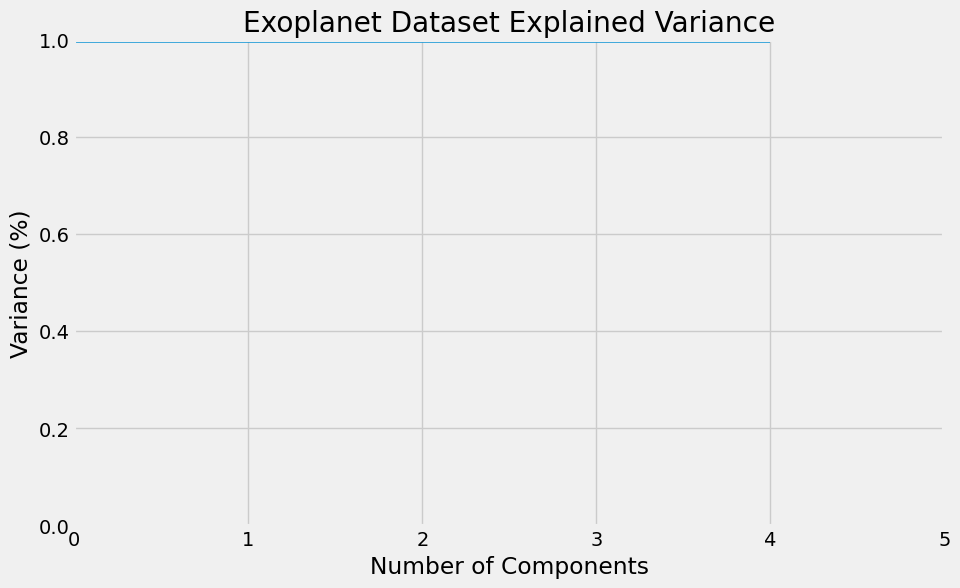

In [7]:
#Apply PCA with n_componenets
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#plots the cumulative explained variance ratio as a function of the number of principal components retained after applying PCA.
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.ylim(0,1)
plt.xlim(0,5)
plt.title('Exoplanet Dataset Explained Variance')
plt.show()
        


In [8]:
from sklearn.decomposition import PCA
pca = PCA() 
X_train = pca.fit_transform(X_train)  # transforms the data into the lower-dimensional space.
X_test = pca.transform(X_test)
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1
print(k)   

1


In [10]:
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [11]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8472135253600501


Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

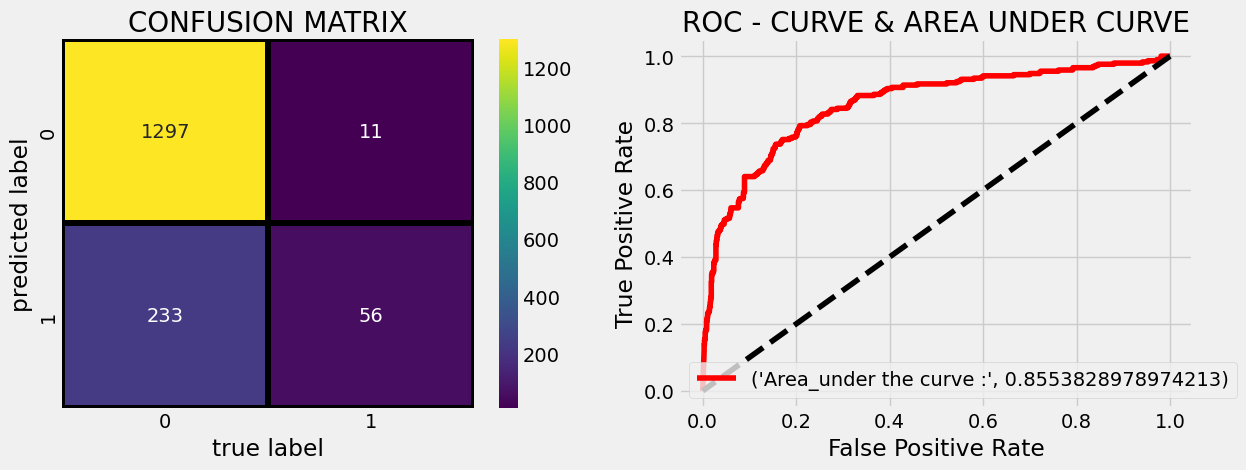

In [12]:
#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label')

#ROC curve and Area under the curve plotting
predicting_probabilites = model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

## Principal Component Analysis Summary

In this section we have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data. Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio). Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. Scikit-Learn contains a couple interesting variants on PCA, including RandomizedPCA and SparsePCA, both also in the sklearn.decomposition submodule. RandomizedPCA, which we saw earlier, uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while SparsePCA introduces a regularization term (see In Depth: Linear Regression) that serves to enforce sparsity of the components.

In the following sections, we will look at other unsupervised learning methods that build on some of the ideas of PCA.